<a href="https://colab.research.google.com/github/A01706648/TC3006_ClassWork/blob/main/m1/1_StaticCollectionVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 2.7 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr

download daily prices for Bitcoin from 2017

In [2]:
BTC = pdr.get_data_yahoo('BTC-USD', start="01/01/2017", interval="d")

Show the content of the data

In [3]:
BTC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,1003.080017,958.698975,963.658020,998.325012,147775008,998.325012
2017-01-02,1031.390015,996.702026,998.617004,1021.750000,222184992,1021.750000
2017-01-03,1044.079956,1021.599976,1021.599976,1043.839966,185168000,1043.839966
2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,344945984,1154.729980
2017-01-05,1191.099976,910.416992,1156.729980,1013.380005,510199008,1013.380005
...,...,...,...,...,...,...
2022-08-06,23326.562500,22961.279297,23291.423828,22961.279297,15978259885,22961.279297
2022-08-07,23359.009766,22894.556641,22963.505859,23175.890625,15886817043,23175.890625
2022-08-08,24203.689453,23176.546875,23179.527344,23809.486328,28575544847,23809.486328


 Now show the last quotations:

In [4]:
BTC.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-06,23326.562500,22961.279297,23291.423828,22961.279297,15978259885,22961.279297
2022-08-07,23359.009766,22894.556641,22963.505859,23175.890625,15886817043,23175.890625
2022-08-08,24203.689453,23176.546875,23179.527344,23809.486328,28575544847,23809.486328
2022-08-09,23898.615234,22982.000000,23811.484375,23164.318359,23555719219,23164.318359
2022-08-10,24126.781250,22773.726562,23126.421875,24014.431641,28504350720,24014.431641



Import the matplotlib and do a plot for the Bitcoin closing prices:




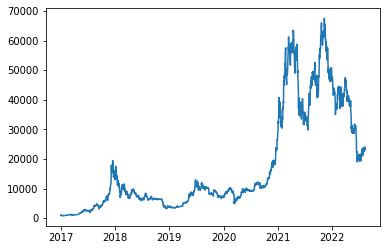

In [5]:
import matplotlib
from matplotlib.pyplot import*
plot(BTC["Close"])
show()

We can check the data types of each variable (column) in the dataset:

In [6]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2048 entries, 2017-01-01 to 2022-08-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2048 non-null   float64
 1   Low        2048 non-null   float64
 2   Open       2048 non-null   float64
 3   Close      2048 non-null   float64
 4   Volume     2048 non-null   int64  
 5   Adj Close  2048 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 112.0 KB


get the previous value of a variable using the shift(n) function. This function works for Panda dataframes. Then we can calculate a new column for the simple returns of Bitcoin as follows:

In [7]:
BTC["R"] = (BTC["Close"] / BTC["Close"].shift(1)) - 1
print(BTC["R"])

Date
2017-01-01         NaN
2017-01-02    0.023464
2017-01-03    0.021620
2017-01-04    0.106233
2017-01-05   -0.122410
                ...   
2022-08-06   -0.014085
2022-08-07    0.009347
2022-08-08    0.027339
2022-08-09   -0.027097
2022-08-10    0.036699
Name: R, Length: 2048, dtype: float64


Now we calculate cc returns in a new column using the shift function:

In [8]:
BTC["r"] = np.log(BTC['Adj Close']) - np.log(BTC['Adj Close'].shift(1))
BTCR = BTC[['R','r']].copy()

We have a null value for the first day since we cannot calculate returns for day 1. We can drop the rows with NA values to ease data calculations:

In [9]:
BTC= BTC.dropna()

We can use the describe function applied to the r column as follows:

In [10]:
sumret = BTC["R"].describe()
sumret

count    2047.000000
mean        0.002418
std         0.041380
min        -0.371695
25%        -0.015893
50%         0.002217
75%         0.020937
max         0.252472
Name: R, dtype: float64

To know which days were the worse, we can do a selection based on a condition. Let’s see which days had a daily return less than 15%:

In [11]:
BTC[BTC["R"]<-0.15]

,High,Low,Open,Close,Volume,Adj Close,R,r
Date,,,,,,,,
2017-09-14,3920.600098,3153.860107,3875.370117,3154.949951,2716310016,3154.949951,-0.187411,-0.207530
2018-01-16,13843.099609,10194.900391,13836.099609,11490.500000,18853799936,11490.500000,-0.168548,-0.184582
2018-02-05,8364.839844,6756.680176,8270.540039,6955.270020,9285289984,6955.270020,-0.159688,-0.173982
2020-03-12,7929.116211,4860.354004,7913.616211,4970.788086,53980357243,4970.788086,-0.371695,-0.464730
2022-06-13,26795.589844,22141.257812,26737.578125,22487.388672,68204556440,22487.388672,-0.159747,-0.174053


To know the best days for Bitcoin:

In [12]:
BTC[BTC["R"]>0.15].sort_values(by=['R'], ascending=False)

,High,Low,Open,Close,Volume,Adj Close,R,r
Date,,,,,,,,
2017-12-07,17899.699219,14057.299805,14266.099609,17899.699219,17950699520,17899.699219,0.252472,0.225119
2017-07-20,2900.699951,2269.889893,2269.889893,2817.600098,2249260032,2817.600098,0.239361,0.214596
2017-12-06,14369.099609,11923.400391,11923.400391,14291.500000,12656300032,14291.500000,0.199283,0.181724
2021-02-08,46203.929688,38076.324219,38886.828125,46196.464844,101467222687,46196.464844,0.187465,0.171821
2020-03-19,6329.735840,5236.968750,5245.416504,6191.192871,51000731797,6191.192871,0.181878,0.167104
2019-04-02,4905.954590,4155.316895,4156.919434,4879.877930,21315047816,4879.877930,0.173560,0.160042
2019-10-25,8691.540039,7479.984375,7490.703125,8660.700195,28705065488,8660.700195,0.155763,0.144761
2017-07-17,2230.489990,1932.619995,1932.619995,2228.409912,1201760000,2228.409912,0.154724,0.143862
2017-09-15,3733.449951,2946.620117,3166.300049,3637.520020,4148069888,3637.520020,0.152956,0.142330


We can also get the main descriptive statistics using specific functions like:

In [13]:
print("The daily average return of Bitcoin is ", BTC["r"].mean())
print("The daily variance of Bitcoin is ", BTC["r"].var())
print("The daily standard deviation (volatility) of Bitcoin return is ", BTC["r"].std())
print("The daily median return of Bitcoin is ",BTC["r"].median())

The daily average return of Bitcoin is  0.0015536547924481251
The daily variance of Bitcoin is  0.0017381880550922785
The daily standard deviation (volatility) of Bitcoin return is  0.04169158254482886
The daily median return of Bitcoin is  0.0022150257023572095


Do a histogram for daily Bitcoin cc returns. Hints: use the plot.hist function for pandas dataframes, and the BTC dataframe.

Interpret the histogram with your own words and in CAPITAL LETTERS

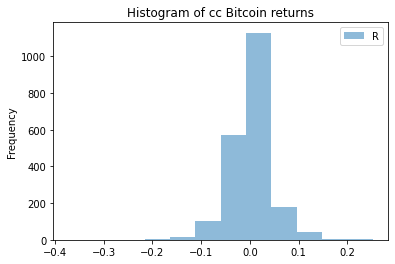

In [14]:
r_bitcoin = pd.DataFrame(BTC[["R"]])
hist=r_bitcoin.plot.hist(bins=12,alpha=0.5,title="Histogram of cc Bitcoin returns")